# **Fig. 6** ABs
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 4/20/2022|

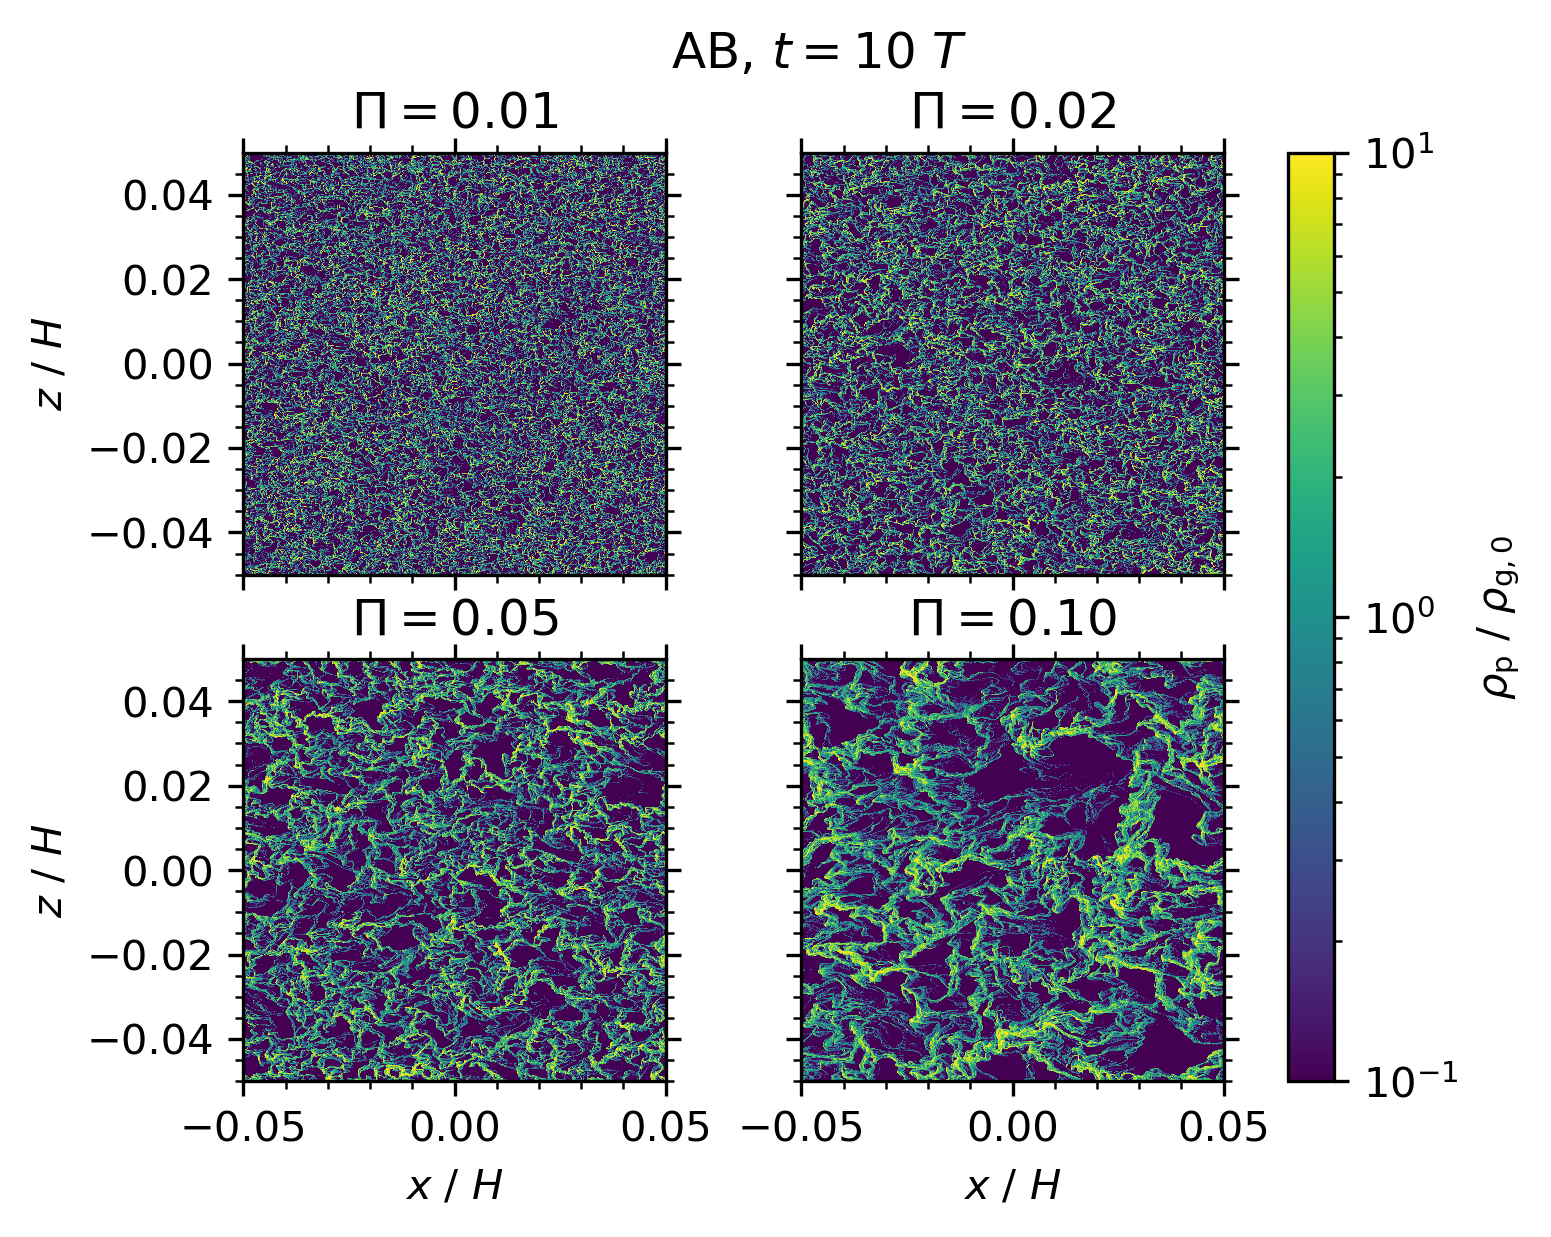

In [2]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

dpi = 300 # PDF resolution (dots per inch)
pwd = '../unstrat/'

fig, axs = plt.subplots(2, 2, figsize=(5.5, 4.1), dpi=300)
run = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
vmin, vmax = 1e-1, 1e1                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/%s/'%(run, Pi, res)
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    t = data['Time']
    # Particle density
    data = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, data, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat)
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
fig.suptitle(f'{run:s}, $t=${t:.0f} $T$')
plt.savefig('figs/abs.png', dpi=1000, bbox_inches='tight', pad_inches=0.01)

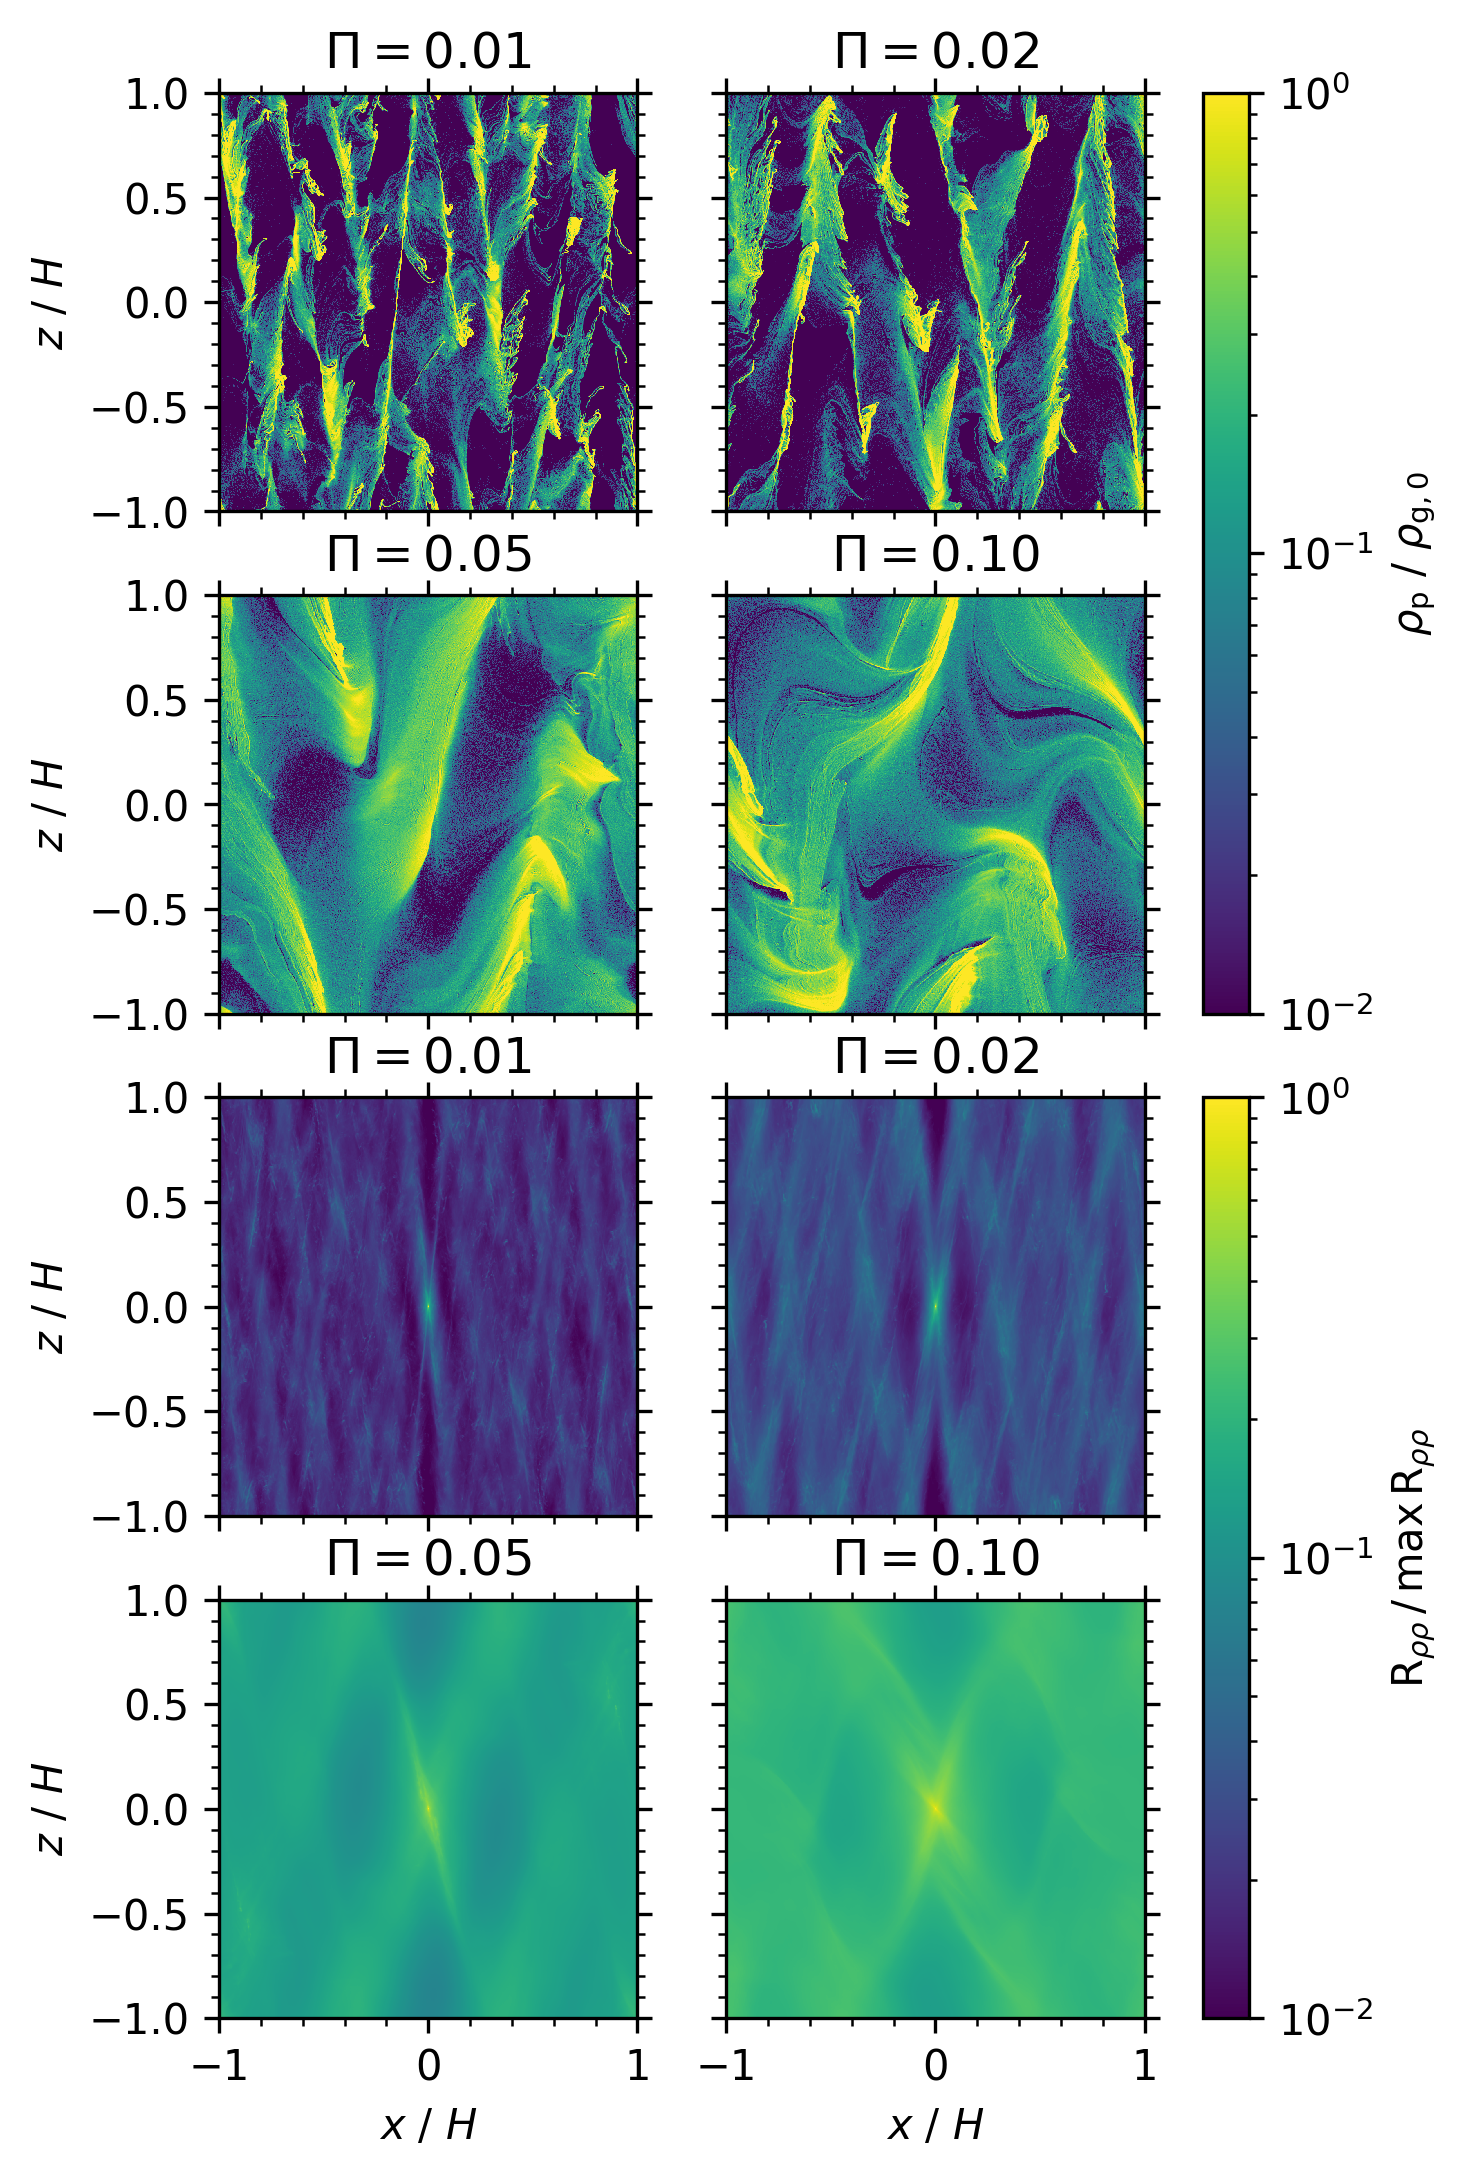

In [ ]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.optimize import curve_fit

dpi = 300 # PDF resolution (dots per inch)
pwd = '../unstrat/'

fig, axs = plt.subplots(4, 2, figsize=(5, 8.5), dpi=dpi)
run = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '1024' #'2048'                             # ***FIX IN FINAL***
vmin, vmax = 1e-2, 1e0                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/old/%s/'%(run, Pi, res)    # ***FIX IN FINAL***
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    T = 2*np.pi/Omega                            # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    # Particle density
    clip = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, clip, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')
    # Autocorrelation
    ft = fftpack.fft2(data['rhop'][0])           # Fourier transform
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real # autocorrelation
    norm = ac/ac[0][0]                           # normalize
    shift = fftpack.fftshift(norm)               # center spectrum
    acs = axs.flat[i+4].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin))
    axs.flat[i+4].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4])
cb_ac = fig.colorbar(acs, ax=axs.flat[4:])
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_ac.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')
plt.savefig('figs/autocorr.png', dpi=190, bbox_inches='tight', pad_inches=0.01)

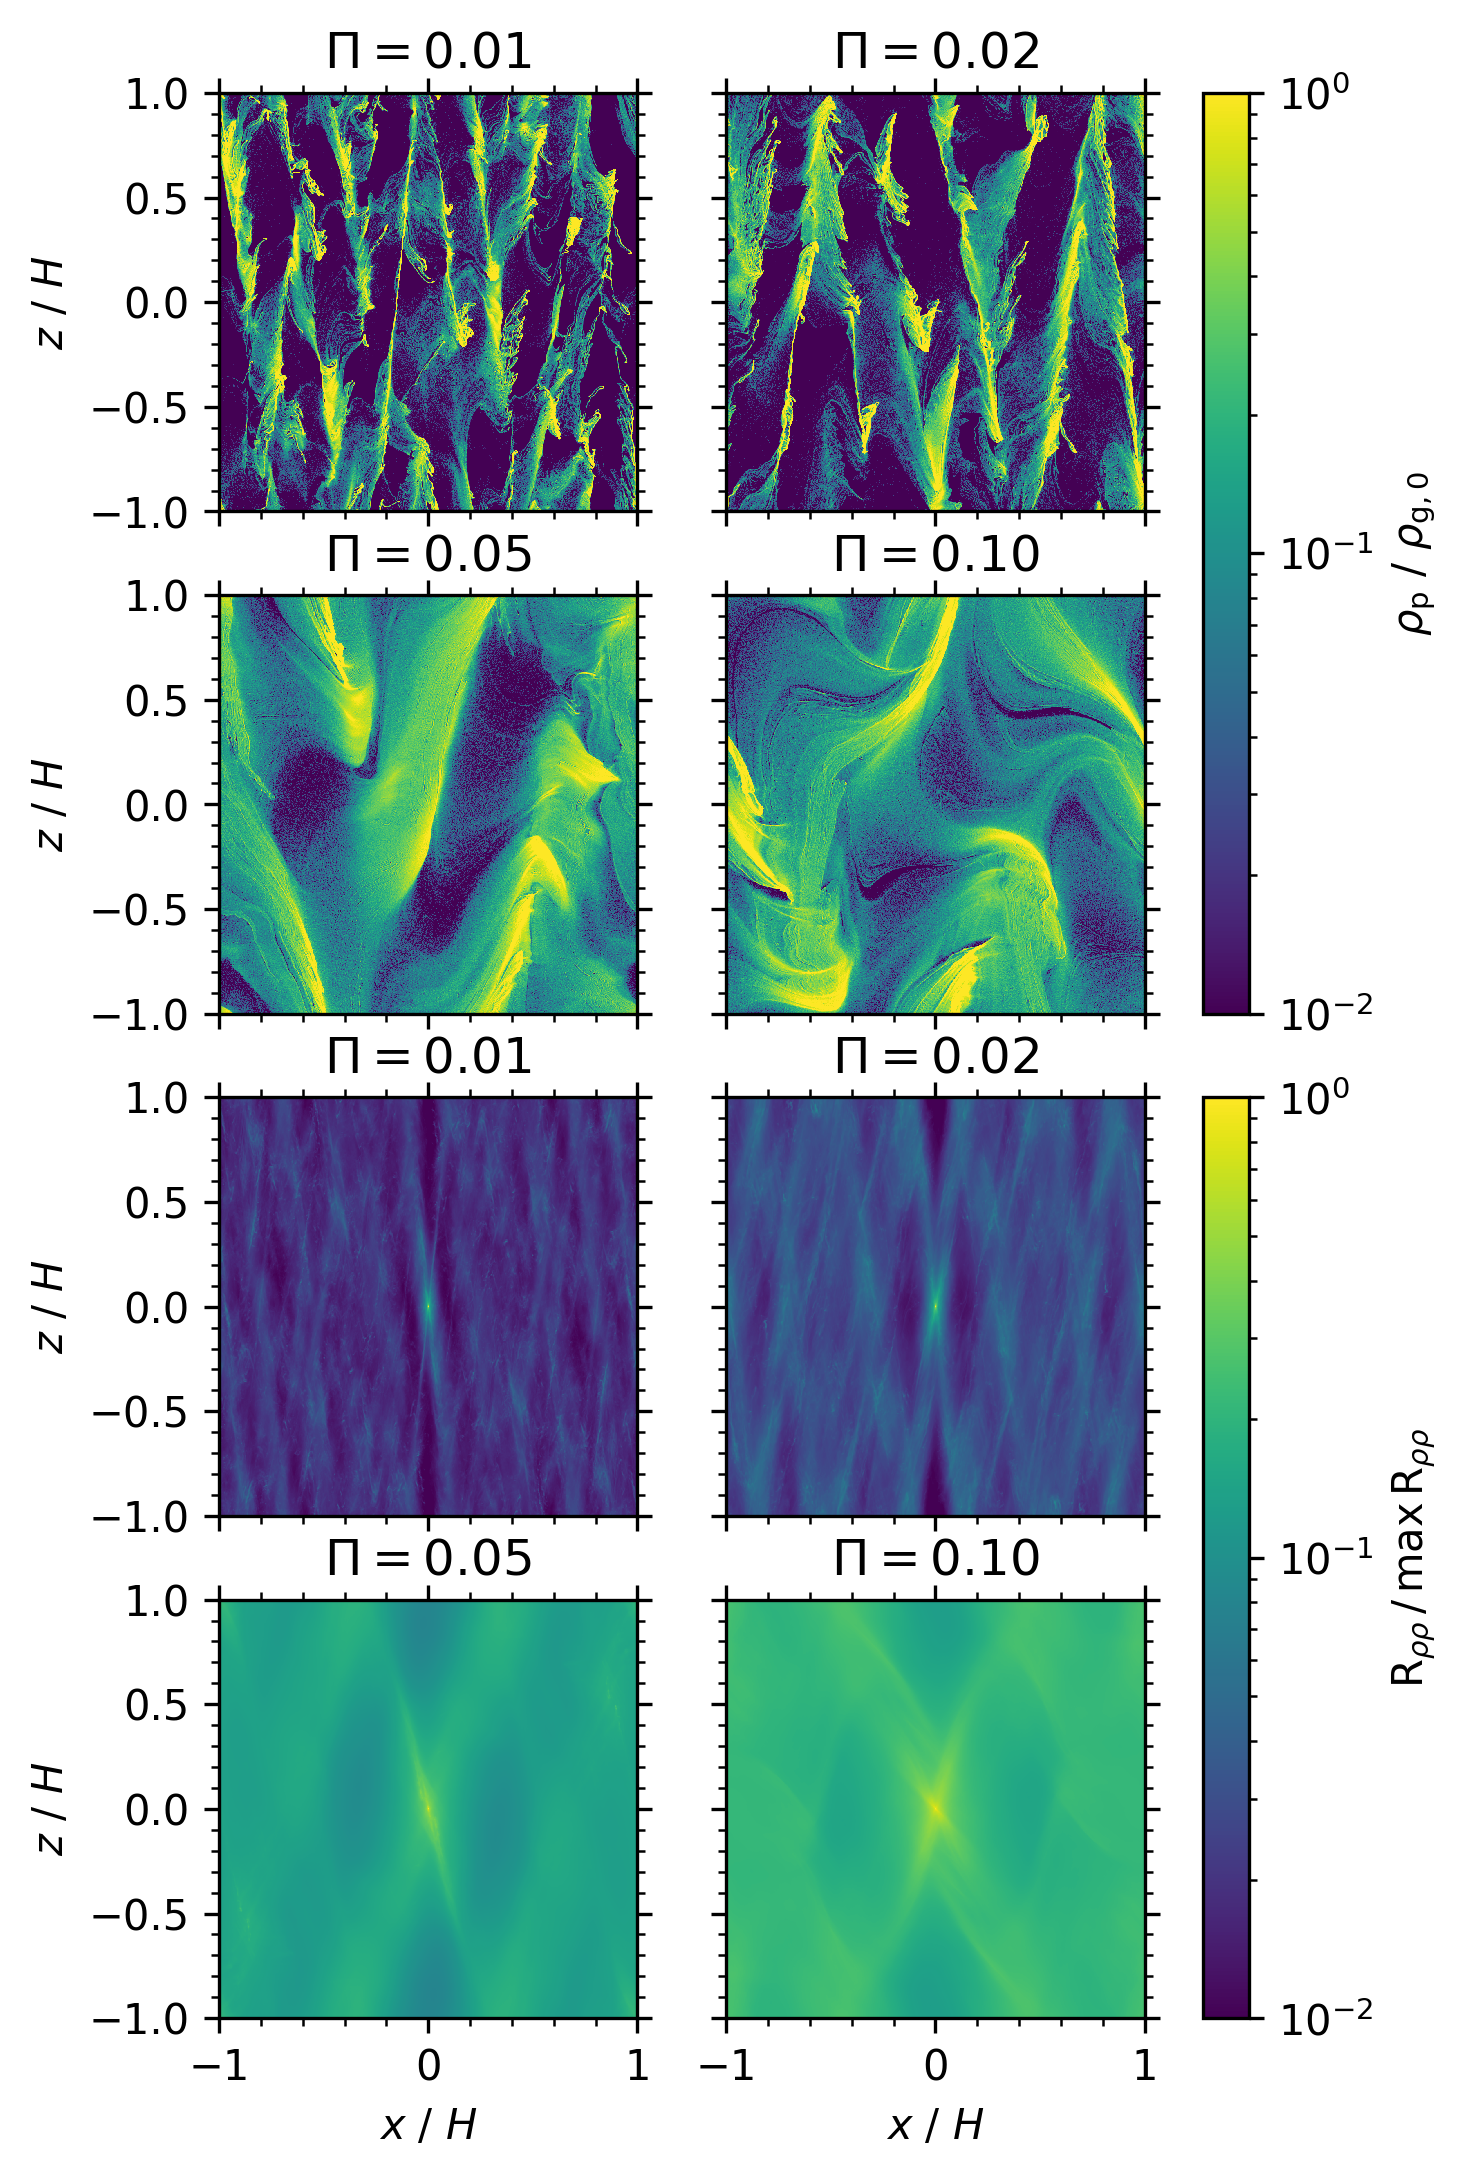

In [4]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.optimize import curve_fit

dpi = 300 # PDF resolution (dots per inch)
pwd = '../unstrat/'

fig, axs = plt.subplots(4, 2, figsize=(5, 8.5), dpi=dpi)
run = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '1024' #'2048'                             # ***FIX IN FINAL***
vmin, vmax = 1e-2, 1e0                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/old/%s/'%(run, Pi, res)    # ***FIX IN FINAL***
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    T = 2*np.pi/Omega                            # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    # Particle density
    clip = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, clip, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')
    # Autocorrelation
    ft = fftpack.fft2(data['rhop'][0])           # Fourier transform
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real # autocorrelation
    norm = ac/ac[0][0]                           # normalize
    shift = fftpack.fftshift(norm)               # center spectrum
    acs = axs.flat[i+4].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin))
    axs.flat[i+4].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4])
cb_ac = fig.colorbar(acs, ax=axs.flat[4:])
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_ac.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')
plt.savefig('figs/autocorr.png', dpi=190, bbox_inches='tight', pad_inches=0.01)